In [1]:
import json
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage import exposure, feature
from sklearn.neighbors import NearestNeighbors

In [2]:
dataset_path = Path('/Users/oliveredholm/Desktop/papers/automatic-web-icon-dataset/data/out/')

In [3]:
images = []
alts = []
for json_path in tqdm(list(dataset_path.glob('*.json'))):
    with open(json_path, 'r') as f:
        attributes = json.load(f)['attributes']
    
    if attributes.get('alt'):
        image_path = json_path.parent / f'{json_path.name.split(".")[0]}.jpg'
        image = cv2.imread(str(image_path))
        images.append(image)
        
        alts.append(attributes['alt'])

100%|██████████| 8689/8689 [00:18<00:00, 468.40it/s]


In [4]:
len(images)

5011

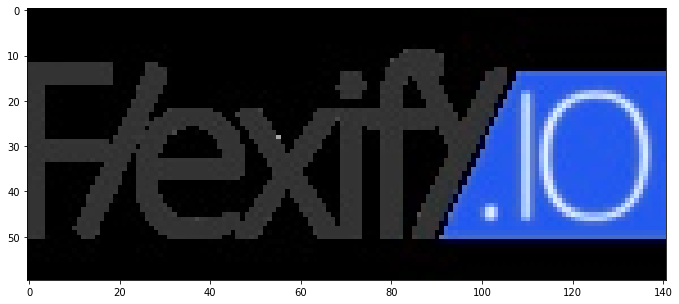

Flexify.io logo


In [5]:
idx = 11

plt.figure(figsize=(20, 5))
plt.imshow(images[idx])
plt.show()

print(alts[idx])

In [63]:
def get_hog_feature(image):
    image = cv2.resize(image, (48, 48))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return feature.hog(gray, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2),
                       transform_sqrt=True)

In [64]:
image_hog_features = [get_hog_feature(image)
                      for image in tqdm(images)]

100%|██████████| 5011/5011 [00:08<00:00, 571.63it/s]


In [65]:
nearest_neighbors = NearestNeighbors(n_neighbors=10, metric='cosine').fit(image_hog_features)

In [77]:
nearest_neighbors.kneighbors([image_hog_features[60]])[1][0][0]

60

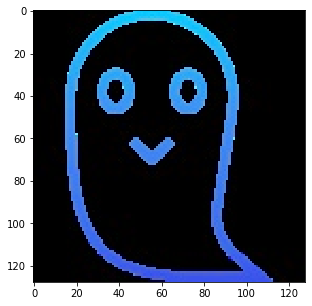

In [67]:
plt.figure(figsize=(20, 5))
plt.imshow(images[60])
plt.show()

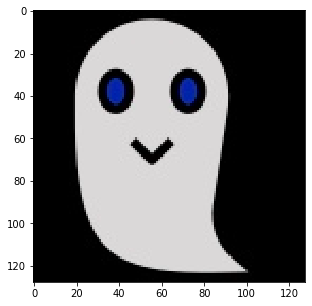

In [73]:
plt.figure(figsize=(20, 5))
plt.imshow(images[2525])
plt.show()

In [69]:
print(alts[2525])

Ghost
